#  Using Matplotlib through C/C++ API

* Change the current working directory into `./demo`

In [1]:
%cd demo

F:\SEU\SEE\PySEE\home\notebook\demo


In [ ]:
%pwd


## 1 Python/C API

https://docs.python.org/3/c-api/index.html

The Application Programmer’s Interface to Python gives 

* **C and C++ programmers access to the Python interpreter** at a variety of levels.

The API is equally usable from C++, but for brevity it is generally referred to as the Python/C API. There are two fundamentally different reasons for using the Python/C API. 

1. The first reason is to write extension modules for specific purposes; these are C modules that **extend the Python interpreter**. This is probably the most common use.


2. The second reason is to **use Python as a component in a larger application**; this technique is generally referred to as **embedding Python in an application**.



## 2 matplotlib-cpp

Extremely simple yet powerful header-only C++ plotting library built on the popular matplotlib

* https://github.com/lava/matplotlib-cpp

### 2.1 Header and lib

**the header file only**

* matplotlib-cpp.h: `./include/matplotlib-cpp.h`

**Python C API:**

Python 3.8 and Numpy

* include

  * C:\Python38\include
  
  * C:\Python38\Lib\site-packages\numpy\core\include\

* Lib

 * C:\Python38


### 2.2  The  minimal example

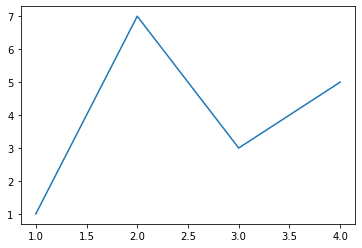

In [2]:
%matplotlib inline 

import matplotlib.pyplot as plt

plt.figure(1) #create figure 1
plt.plot([1,2,3,4], [1,7,3,5]) #draw on figure 1 <x,y> list/array
plt.show() #show figure on screen

In [3]:
%%file ./src/demo_matplotlib.cpp
#include <iostream>
#include "matplotlibcpp.h"

using namespace std;
namespace plt = matplotlibcpp;

int main() {
    vector<int> x{1,2,3,4};
    vector<int> y{1,7,3,5};
    plt::plot(x,y);
    plt::show();
}

Writing ./src/demo_matplotlib.cpp


In [4]:
%%file ./makefile-demo-matplotlib.mk

INC=-I./include \
    -IC:/Python38/include \
    -IC:/Python38/Lib/site-packages/numpy/core/include
        
LIBDIR= C:/Python38/

SRC= ./src/demo_matplotlib.cpp 
            
BIN= ./bin/demo

all: spring_matplotlib

spring_matplotlib: 
	 g++ -w -o $(BIN) $(SRC) $(INC) -L$(LIBDIR) -lPython38


Writing ./makefile-demo-matplotlib.mk


* include: `-IC:\Python38\include -IC:\Python38\Lib\site-packages\numpy\core\include\`
        
* link lib: `-LC:\Python38\ -lpython38`

**GGG Option**

* **-w**: disable warning messages

In [5]:
!make -f makefile-demo-matplotlib.mk

g++ -w -o ./bin/demo ./src/demo_matplotlib.cpp  -I./include -IC:/Python38/include -IC:/Python38/Lib/site-packages/numpy/core/include -LC:/Python38/ -lPython38


**Run in the terminal**

![](./img/matplotlib-cpp.jpg)

### 2.3 The Behavior of Springs

[UNDERSTANDING EXPERIMENTAL DATA](./Unit2-3-UNDERSTANDING_EXPERIMENTAL_DATA.ipynb)

In [6]:
%%file ./data/springData.csv
Distance(m),Mass(kg)
0.0865,0.1
0.1015,0.15
0.1106,0.2
0.1279,0.25
0.1892,0.3
0.2695,0.35
0.2888,0.4
0.2425,0.45
0.3465,0.5
0.3225,0.55
0.3764,0.6
0.4263,0.65
0.4562,0.7
0.4502,0.75
0.4499,0.8
0.4534,0.85
0.4416,0.9
0.4304,0.95
0.437,1.0

Overwriting ./data/springData.csv


####  std::istringstream

Input stream class to operate on strings.

Objects of this class use a `string buffer` that contains a sequence of characters.

This sequence of characters can be` accessed` directly as a string object, using member `str`.

The characters in the sequence can be `extracted` from the stream using any operation allowed on input streams.

In [7]:
%%file ./src/spring_matplotlib.cpp

#include <iostream>
#include <fstream>
#include <sstream>
#include <string>
#include <vector>
#include "matplotlibcpp.h"
#include "curvefit.h"  // Unit8-2-3-ctypes-ployfit

using namespace std;
namespace plt = matplotlibcpp;

int main(void)
{
  vector<double> vecforces;  
  vector<double> vecdistances; 
    
  ifstream fin("./data/springData.csv");
  if(!fin) {
     cerr<<"failed to open file for reading"<<endl;
     return 1;
  }
  string line;
  getline(fin, line);
  while(getline(fin, line))
  {
      istringstream sin(line);
      vector<string> fields; 
      string field;
      while (getline(sin, field, ','))
         fields.push_back(field); 
      string d =fields[0];
      string m =fields[1];
      vecdistances.push_back(atof(d.c_str()));
      vecforces.push_back(9.81*atof(m.c_str()));
  };
  fin.close();
 
  int n = 1; // n is the degree of Polynomial
  double a[n + 1];
  int size=vecdistances.size();
  int baddata=6;
  c_polyfit(vecforces.data(),vecdistances.data(),size - baddata, n, a); 
  cout << "Polynomial Fit:k =" << 1 / a[1] << std::endl;
  
  plt::plot(vecforces, vecdistances, "r*");
 
  vector<double> vecpredictedDistances;
  vector<double> vecprevarforces= vector<double>(vecforces.begin(), vecforces.end()-baddata);
  for (auto val : vecprevarforces)
      vecpredictedDistances.push_back(a[1]*val + a[0]);
  plt::plot(vecprevarforces, vecpredictedDistances,"b+");
  plt::plot(vecprevarforces, vecpredictedDistances);
    
  plt::title("Spring Data");
  plt::show();
}

Overwriting ./src/spring_matplotlib.cpp


In [8]:
%%file ./makefile-spring-matplotlib.mk
INC= -I./include \
	-IC:/Python38/include \
	-IC:/Python38/Lib/site-packages/numpy/core/include
     
LIB= -LC:/Python38/ \
	-L./bin/

SRC= ./src/spring_matplotlib.cpp    
            
BIN= ./bin/demofit

all: spring_matplotlib
	./bin/demofit.exe

spring_matplotlib:
	g++ -w -o  $(BIN) $(SRC) $(LIB) -lPython38  -lcurvefit $(INC) 


Overwriting ./makefile-spring-matplotlib.mk


In [9]:
!make -f makefile-spring-matplotlib.mk

g++ -w -o  ./bin/demofit ./src/spring_matplotlib.cpp     -LC:/Python38/ -L./bin/ -lPython38  -lcurvefit -I./include -IC:/Python38/include -IC:/Python38/Lib/site-packages/numpy/core/include 
./bin/demofit.exe
Polynomial Fit:k =15.4534
Figure(640x480)


**Run in the terminal**

* ./demo/

![](./img/spring_matplotlib_cpp.jpg)